# Neural Network for Fashion MNIST dataset

In [33]:
import numpy as np
from numpy.random import default_rng
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix

In [4]:
# read csv and save output as numpy array
df_train = np.loadtxt('fashion-mnist_train.csv', delimiter=',', skiprows=1)
df_val = np.loadtxt('fashion-mnist_test.csv', delimiter=',', skiprows=1)

In [5]:
# Split features and target arrays
X = df_train[:, 1:]
y = df_train[:, 0]

In [6]:
# random permutation of indexes
# use 1st 10000 rows for training and evaluation
rng = np.random.default_rng(seed=42)
r = rng.choice(len(df_train), len(df_train), replace=False)
X_train, y_train = X[r[:10000], :], y[r[:10000]]

In [7]:
# scale the train data in ranage [0,1] for better performance
X_train = X_train/255

In [8]:
# verify that dataset is properly balanced
from collections import Counter
sorted(Counter(y_train).items())

[(0.0, 1026),
 (1.0, 963),
 (2.0, 1012),
 (3.0, 1025),
 (4.0, 1001),
 (5.0, 1011),
 (6.0, 1029),
 (7.0, 979),
 (8.0, 1018),
 (9.0, 936)]

### Plot 16 random samples from the training set with the corresponding labels.

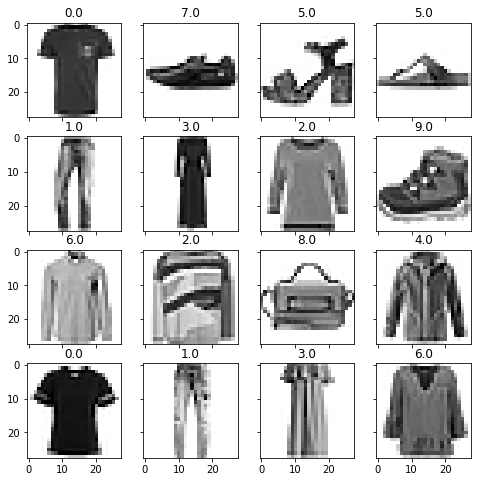

In [56]:
# show 1st 16 pictures

# https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html

fig, axs = plt.subplots(4, 4, sharex='col', sharey='row', figsize=(8, 8))

for i, ax in enumerate(axs.flat):
    image = X_train[i].reshape(28,28)
    ax.imshow(image, cmap=plt.cm.binary)
    ax.set_title(y_train[i])

### Task 2. Train a multilayer perceptron with hyperparameters tweaking

In [10]:
# Define baseline model
clf = MLPClassifier(random_state=1, early_stopping=True, validation_fraction=0.2)
clf.fit(X_train, y_train.ravel())

MLPClassifier(early_stopping=True, random_state=1, validation_fraction=0.2)

In [11]:
# Scoring
clf_score = cross_val_score(clf, X_train, y_train, cv=3, scoring='f1_micro')
print(f'Model = baseline MLPClassifier, f1_score={round(clf_score.mean(), 6)}, deviation={round(clf_score.std(), 6)}')

Model = baseline MLPClassifier, f1_score=0.8503, deviation=0.001623


Baseline model does provide good f1 score of 85% <br> Let us try to improve it by some parameter tuning

We start with hidden layers tuning

In [13]:
parameters = {'hidden_layer_sizes': [[256, 256, 128], [256, 128, 128], [256, 128, 128, 128]]
            } # use simple network with 3 hidden layers
clf = MLPClassifier(random_state=1, early_stopping=True, validation_fraction=0.2)
clf_grid = GridSearchCV(clf, parameters, verbose=3, cv=3, scoring='f1_micro')

clf_grid.fit(X_train, y_train.ravel())
print(f'The most optimal value for {clf_grid.best_params_}  gives an F1 score of {round(clf_grid.best_score_, 5)}')

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] END .................hidden_layer_sizes=[256, 256, 128]; total time=  16.9s
[CV] END .................hidden_layer_sizes=[256, 256, 128]; total time=  14.6s
[CV] END .................hidden_layer_sizes=[256, 256, 128]; total time=  11.8s
[CV] END .................hidden_layer_sizes=[256, 128, 128]; total time=   9.3s
[CV] END .................hidden_layer_sizes=[256, 128, 128]; total time=  13.2s
[CV] END .................hidden_layer_sizes=[256, 128, 128]; total time=  16.7s
[CV] END ............hidden_layer_sizes=[256, 128, 128, 128]; total time=  18.5s
[CV] END ............hidden_layer_sizes=[256, 128, 128, 128]; total time=  12.6s
[CV] END ............hidden_layer_sizes=[256, 128, 128, 128]; total time=  18.1s
The most optimal value for {'hidden_layer_sizes': [256, 128, 128]}  gives an F1 score of 0.8595


We got an improved score comparing to a baseline model using different set on neurons in each layer. By default, MLClassifier uses 3 layers with 100 neurons in each. I have tested 3 alternatives and by using 3 layers in 256, 128 and 128 neurons respectively we were able to slightly increase the f1 score

Let us try further model score increase by tuning "batch size" and "learning rate" parameters using the tuned hidden layer parameter

In [28]:
parameters = {'batch_size': [200, 600, 1000],
              'learning_rate_init': [0.001, 0.01, 0.1]  
            } # use simple network with 3 hidden layers
clf = MLPClassifier(random_state=1, early_stopping=True, validation_fraction=0.2, hidden_layer_sizes=[256, 128, 128])
clf_grid = GridSearchCV(clf, parameters, verbose=3, cv=3, scoring='f1_micro')

clf_grid.fit(X_train, y_train.ravel())
print(f'The most optimal value for {clf_grid.best_params_}  gives an F1 score of {round(clf_grid.best_score_, 5)}')

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END batch_size=200, learning_rate_init=0.001;, score=0.852 total time=   9.2s
[CV 2/3] END batch_size=200, learning_rate_init=0.001;, score=0.858 total time=  13.3s
[CV 3/3] END batch_size=200, learning_rate_init=0.001;, score=0.868 total time=  16.6s
[CV 1/3] END batch_size=200, learning_rate_init=0.01;, score=0.851 total time=  13.6s
[CV 2/3] END batch_size=200, learning_rate_init=0.01;, score=0.845 total time=  10.9s
[CV 3/3] END batch_size=200, learning_rate_init=0.01;, score=0.851 total time=  11.0s
[CV 1/3] END batch_size=200, learning_rate_init=0.1;, score=0.601 total time=  18.7s
[CV 2/3] END batch_size=200, learning_rate_init=0.1;, score=0.721 total time=   9.4s
[CV 3/3] END batch_size=200, learning_rate_init=0.1;, score=0.721 total time=   7.0s
[CV 1/3] END batch_size=600, learning_rate_init=0.001;, score=0.854 total time=   7.3s
[CV 2/3] END batch_size=600, learning_rate_init=0.001;, score=0.848 total time=

Seems like that by using default parameters we get the highest score from the parameters set, so we keep the default ones.

We will try to optimize the model by tuning regularization parameter "alpha" and different solvers for weight optimization

In [18]:
parameters = {'alpha': [0.0001, 0.001, 0.01],
              'solver': ['sgd', 'adam']  
            } # use simple network with 3 hidden layers
clf = MLPClassifier(random_state=1, early_stopping=True, validation_fraction=0.2, hidden_layer_sizes=[256, 128, 128])
clf_grid = GridSearchCV(clf, parameters, verbose=3, cv=3, scoring='f1_micro')

clf_grid.fit(X_train, y_train.ravel())
print(f'The most optimal value for {clf_grid.best_params_}  gives an F1 score of {round(clf_grid.best_score_, 5)}')


Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END ...........................alpha=0.0001, solver=sgd; total time=  20.8s
[CV] END ...........................alpha=0.0001, solver=sgd; total time=  21.4s
[CV] END ...........................alpha=0.0001, solver=sgd; total time=  24.3s
[CV] END ..........................alpha=0.0001, solver=adam; total time=   9.2s
[CV] END ..........................alpha=0.0001, solver=adam; total time=  13.5s
[CV] END ..........................alpha=0.0001, solver=adam; total time=  16.6s
[CV] END ............................alpha=0.001, solver=sgd; total time=  20.9s
[CV] END ............................alpha=0.001, solver=sgd; total time=  21.6s
[CV] END ............................alpha=0.001, solver=sgd; total time=  24.1s
[CV] END ...........................alpha=0.001, solver=adam; total time=   9.6s
[CV] END ...........................alpha=0.001, solver=adam; total time=  13.1s
[CV] END ...........................alpha=0.001, 

Again, default parameters show the highest score, so no additional updates done here

Finally, we will test different activation funcitons

In [19]:
parameters = {'activation': ['logistic', 'tanh', 'relu']  # default is "relu"
            }
clf = MLPClassifier(random_state=1, early_stopping=True, validation_fraction=0.2, hidden_layer_sizes=[256, 128, 128])
clf_grid = GridSearchCV(clf, parameters, verbose=3, cv=3, scoring='f1_micro')

clf_grid.fit(X_train, y_train.ravel())
print(f'The most optimal value for {clf_grid.best_params_}  gives an F1 score of {round(clf_grid.best_score_, 5)}')

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3] END ...............activation=logistic;, score=0.843 total time=  22.9s
[CV 2/3] END ...............activation=logistic;, score=0.856 total time=  18.9s
[CV 3/3] END ...............activation=logistic;, score=0.851 total time=  22.3s
[CV 1/3] END ...................activation=tanh;, score=0.849 total time=  11.4s
[CV 2/3] END ...................activation=tanh;, score=0.855 total time=  13.4s
[CV 3/3] END ...................activation=tanh;, score=0.857 total time=  16.6s
[CV 1/3] END ...................activation=relu;, score=0.852 total time=   9.3s
[CV 2/3] END ...................activation=relu;, score=0.858 total time=  13.3s
[CV 3/3] END ...................activation=relu;, score=0.868 total time=  16.7s
The most optimal value for {'activation': 'relu'}  gives an F1 score of 0.8595


We will keep the default activation function ("relu")

Let us calculate the score for using the complete dataset fro training and validation

In [63]:
# Split validation dataset
X_val = df_val[:, 1:]
y_val = df_val[:, 0]

In [31]:
clf = MLPClassifier(random_state=1, early_stopping=True, validation_fraction=0.2, hidden_layer_sizes=[256, 128, 128])
clf.fit(X, y)

MLPClassifier(early_stopping=True, hidden_layer_sizes=[256, 128, 128],
              random_state=1, validation_fraction=0.2)

In [64]:
# Predictions
train_predict = clf.predict(X)
test_predict = clf.predict(X_val)

# Evaluate the model
print('Model performance on training set:')


score = f1_score(train_predict, y, average='micro')
print(f'Training F1 score: {score}')

print('Model performance on testing set:')
score = f1_score(test_predict, y_val, average='micro')
print(f'Test F1 score: {score}')

Model performance on training set:
Training F1 score: 0.92175
Model performance on testing set:
Test F1 score: 0.89


Quite good f1 score achieved with over 92%  on training dataset and 89% on a validation dataset

### Confusion matrix

In [ ]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

Text(0.5, 1.0, 'Confusion matrix')

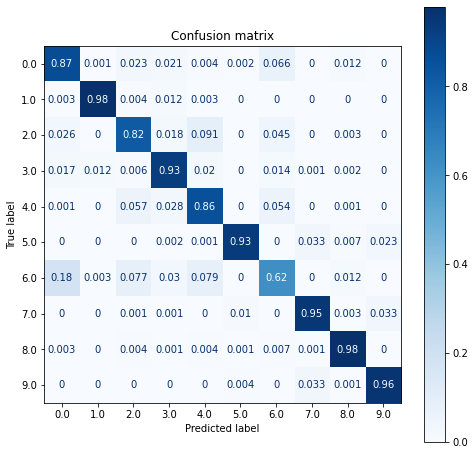

In [44]:
fig, ax = plt.subplots(figsize=(8, 8))

disp = plot_confusion_matrix(clf, X_val, y_val, cmap=plt.cm.Blues, ax=ax, normalize='true') 
disp.ax_.set_title('Confusion matrix')

Most categories are well predicted, however we do have particluaryt one category with low prediciton score. Let us evaluate it further

Text(0.5, 1.0, 'Confusion matrix')

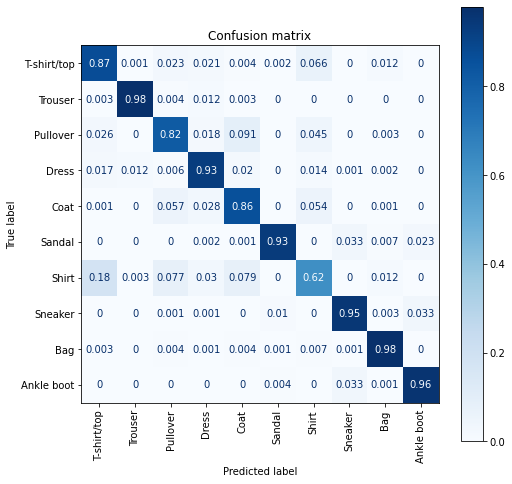

In [47]:
# Define lables for categories https://www.kaggle.com/zalando-research/fashionmnist:
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# re-cfreate confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))

disp = plot_confusion_matrix(clf, X_val, y_val, cmap=plt.cm.Blues, ax=ax, normalize='true', display_labels=labels, xticks_rotation='vertical') 
disp.ax_.set_title('Confusion matrix')

Plot shows that category "shirt" is often mixed with categories "T-shirt/top", "Pullover" or "Coat". tThis makes sense as all the categories represent similar types of garments <br>

From another sie categories as "Ancle boot" and "Trouser" differ quite much from any other categories and therefore deliver very good predicton score.